In [1]:
!git clone https://github.com/pallavikailas/crop-disease.git

Cloning into 'crop-disease'...
remote: Enumerating objects: 392, done.
remote: Counting objects: 100% (218/218), done.
remote: Compressing objects: 100% (88/88), done.
remote: Total 392 (delta 136), reused 195 (delta 126), pack-reused 174 (from 1)
Receiving objects: 100% (392/392), 10.50 MiB | 9.19 MiB/s, done.
Resolving deltas: 100% (219/219), done.


In [2]:
%cd crop-disease

/content/crop-disease


In [3]:
!git branch -a

* main
  remotes/origin/HEAD -> origin/main
  remotes/origin/main
  remotes/origin/version_2
  remotes/origin/version_3


In [4]:
!git checkout version_3

Branch 'version_3' set up to track remote branch 'version_3' from 'origin'.
Switched to a new branch 'version_3'


In [5]:
!pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 30.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 43.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.3/79.3 kB 3.3 MB/s eta 0:00:00


In [6]:
import pandas as pd

# Load the CSV file
file_path = "/content/crop-disease/data/crop_disease.csv"
df = pd.read_csv(file_path)

# Display unique values in each column
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in '{column}': {unique_values}")


Unique values in 'Temperature': [33.82026173 27.00078604 29.89368992 ... 25.79216923 19.2904929
 18.44514815]
Unique values in 'Humidity': [54.67078947 52.88029836 70.46135059 ... 69.69427556 85.77088212
 61.87197899]
Unique values in 'Rainfall': [130.66745827 192.18499882 113.55454911 ...  73.10576252 119.67222153
 114.32591352]
Unique values in 'Soil_Moisture': [46.34028987 22.64431053 30.91736023 ... 28.37812336 27.9370682
 30.56651617]
Unique values in 'Wind_Speed': [6.99568951 5.52016145 6.85013123 ... 6.03374436 4.93415861 7.59622286]
Unique values in 'Sunlight_Hours': [ 7.59576595  6.333538   11.46720049 ...  4.0051404   7.93615817
  8.44793152]
Unique values in 'Soil_pH': [6.97275419 6.71146177 5.91216    ... 7.00527077 7.0083816  6.32801323]
Unique values in 'Growth_Stage': [3 1 2]
Unique values in 'Surrounding_Crop_Diversity': [3.2545692  2.31181586 3.41847847 ... 4.21685553 2.06288192 3.404655  ]
Unique values in 'Crop_Type': ['Rice' 'Maize' 'Wheat' 'Barley' 'Soybean']
Uniqu

In [7]:
from src.dataloader import load_and_preprocess_data

# Load and preprocess data
X, y = load_and_preprocess_data("data/crop_disease.csv")

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
%cd src

/content/crop-disease/src


In [10]:
from training import train_ensemble_model, save_model

ensemble_model, label_encoder = train_ensemble_model(X_train, y_train)
save_model(ensemble_model, label_encoder)

Accuracy Score for Random Forest: 0.8681
Accuracy Score for SVM: 0.6100
Accuracy Score for KNN: 0.5000
Accuracy Score for XGBoost: 0.8938


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy Score for Logistic Regression: 0.5781
Model and label encoder saved to models/ensemble_model.pkl


In [11]:
from evaluation import evaluate_model

evaluate_model(ensemble_model, X_test, y_test)

Accuracy: 0.9100


0.91

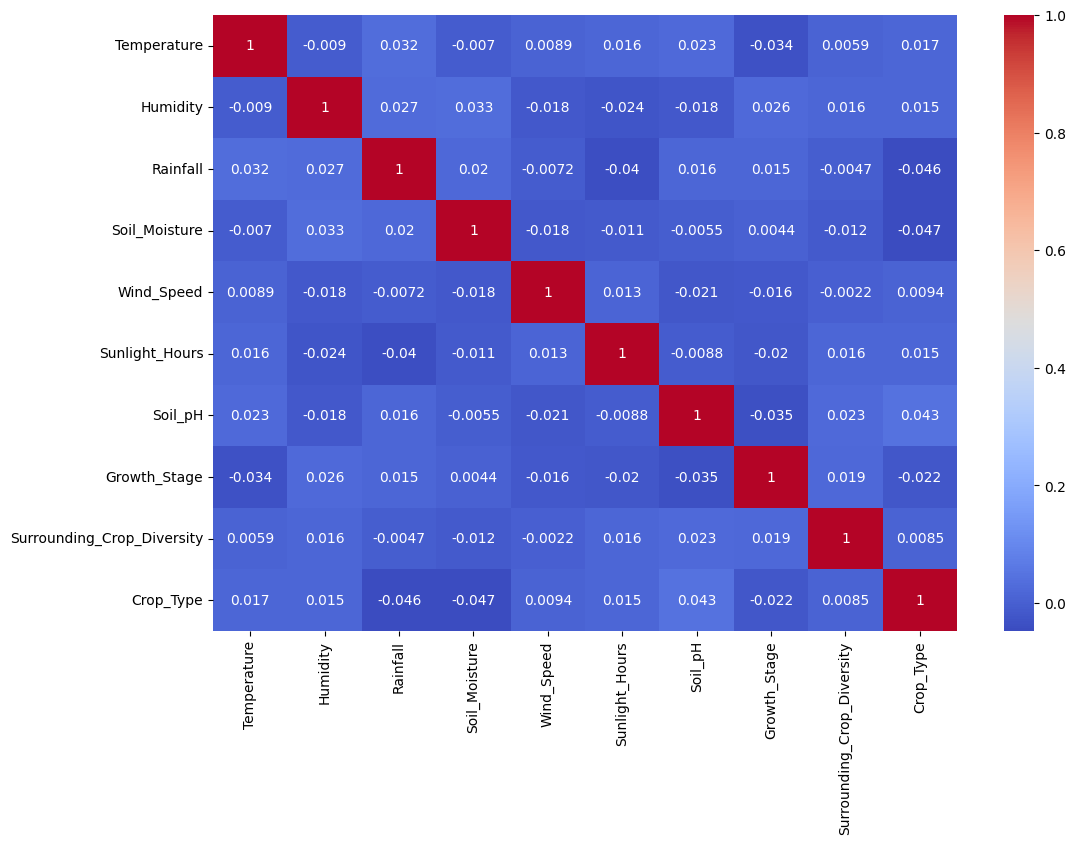

In [12]:
from visualisation import plot_correlation_matrix, plot_scatter

plot_correlation_matrix(X)